TIP : make feature classified from continous
if making fatures check corr.
when default features have very low corr make new features from it and drop that

In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [144]:
#load data
df = pd.read_csv("/kaggle/input/titanic/train.csv")
dt = pd.read_csv("/kaggle/input/titanic/test.csv")

In [145]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [146]:
df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace = True)

In [147]:
df['Name'].head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [148]:
title =[]
for t in df['Name']:
    if 'Mrs' in t:
        title.append('Mrs')
    elif 'Master' in t:
        title.append('Master')
    elif 'Misc' in t:
        title.append('Misc')
    elif 'Miss' in t:
        title.append('Miss')
    elif 'Mr' in t:
        title.append('Mr')
    else:
        title.append('Rare')

In [149]:
df['Title'] = title

In [150]:
df.drop(['Name'],axis=1,inplace =True)

In [151]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [152]:
df['Embarked'].fillna('S', inplace =True)

In [153]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rare
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


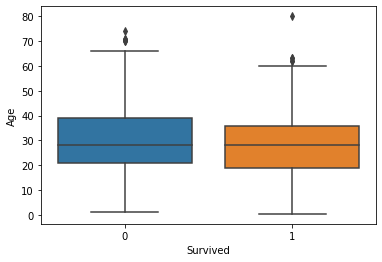

In [154]:
sns.boxplot(y='Age', x='Survived', data=df )

In [155]:
df['Age'] = df['Age'][df['Age']<75]

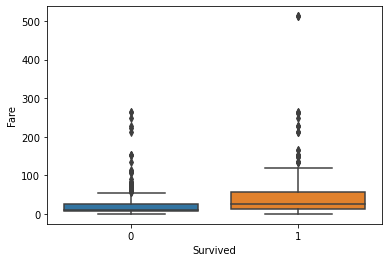

In [156]:
sns.boxplot(y='Fare', x='Survived', data=df )

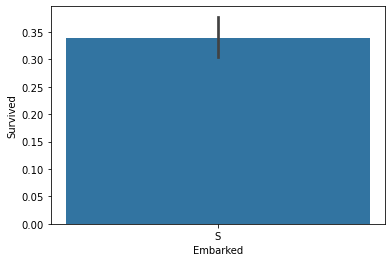

In [157]:
sns.barplot(x = df['Embarked'][df['Embarked']=='S'], y = 'Survived', data =df)

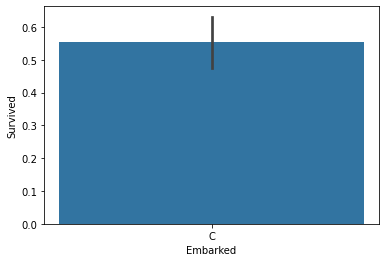

In [158]:
sns.barplot(x = df['Embarked'][df['Embarked']=='C'], y = 'Survived',  data =df)

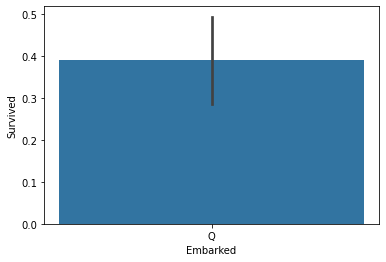

In [159]:
sns.barplot(x = df['Embarked'][df['Embarked']=='Q'], y = 'Survived', data =df)

In [160]:
amb = []
for t in df['Embarked']:
    if t=='C':
        amb.append(1)
    elif t=='Q':
        amb.append(2)
    else:
        amb.append(3)

df['Embarked'] = amb

In [161]:
df['Fare'] = df['Fare'][df['Fare'] < 400]

In [162]:
df['Survived'][df['Survived']==0]

0      0
4      0
5      0
6      0
7      0
      ..
884    0
885    0
886    0
888    0
890    0
Name: Survived, Length: 549, dtype: int64

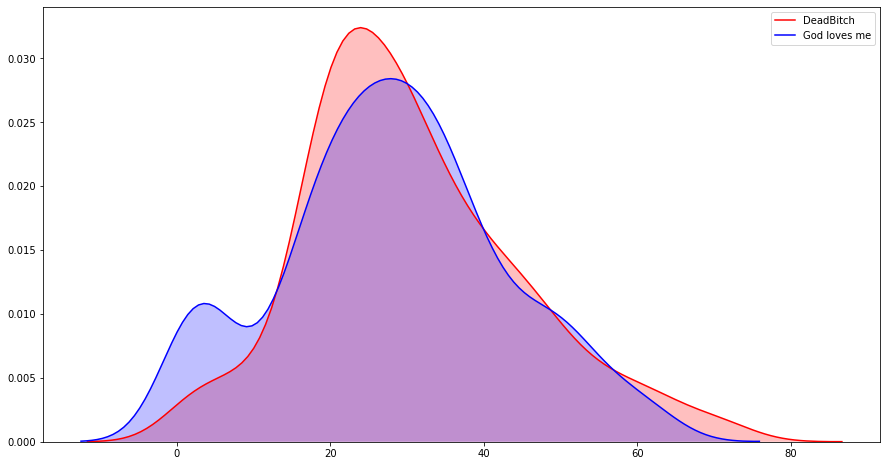

In [163]:
plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[(df.Survived==0),'Age'], shade = True, color ='r', label ='DeadBitch')
sns.kdeplot(df.loc[(df.Survived==1),'Age'], shade = True, color ='b', label = 'God loves me')

In [164]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

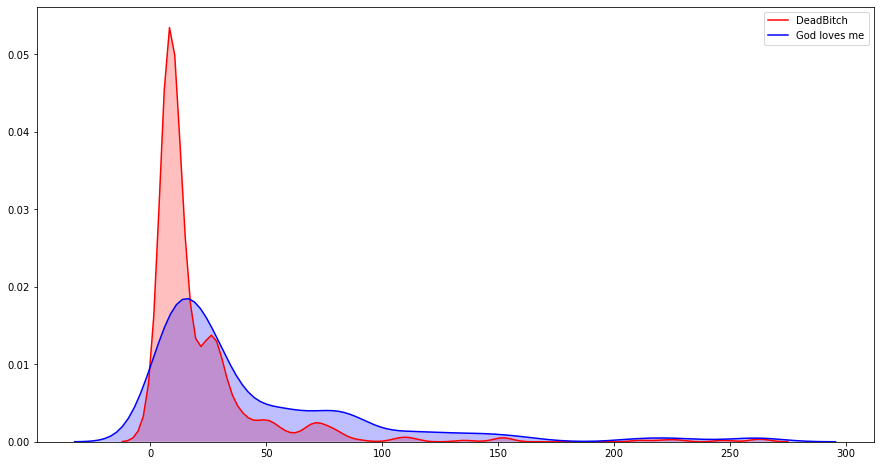

In [165]:
plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[(df.Survived==0),'Fare'], shade = True, color ='r', label ='DeadBitch')
sns.kdeplot(df.loc[(df.Survived==1),'Fare'], shade = True, color ='b', label = 'God loves me')

In [166]:
#most in fare btw 0-40 

In [167]:
fare = []
for t in df['Fare']:
    if t<50 :
        fare.append('low')
    elif t<100:
        fare.append('mid')
    else :
        fare.append('high')
        
        

In [168]:
df['fare_cat'] = fare

In [169]:
df['Pclass'].unique()

array([3, 1, 2])

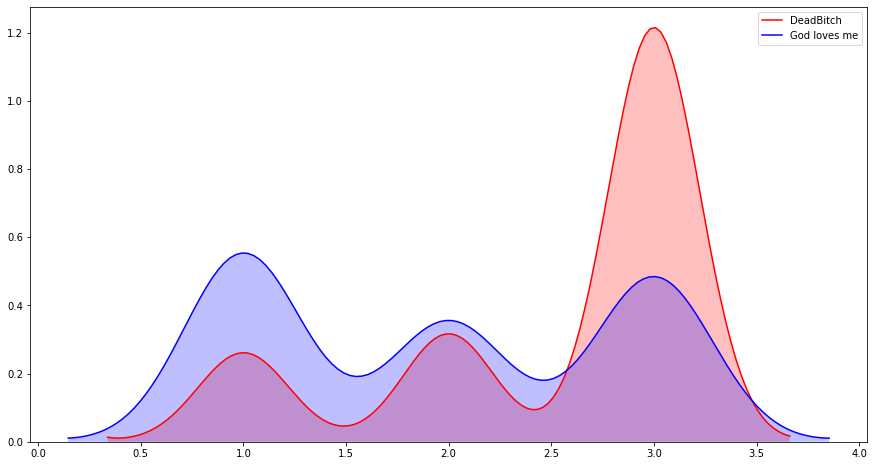

In [170]:
plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[(df.Survived==0),'Pclass'], shade = True, color ='r', label ='DeadBitch')
sns.kdeplot(df.loc[(df.Survived==1),'Pclass'], shade = True, color ='b', label = 'God loves me')

In [171]:
#high class people die more
hclass = []
for t in df['Pclass']:
    if t==3:
        hclass.append(0)
    else:
        hclass.append(1)

In [172]:
df['high_class'] = hclass

In [173]:
df['family']  = df['SibSp'] + df['Parch'] +1 
df['family'][df['family']<2]

2      1
4      1
5      1
6      1
11     1
      ..
884    1
886    1
887    1
889    1
890    1
Name: family, Length: 537, dtype: int64

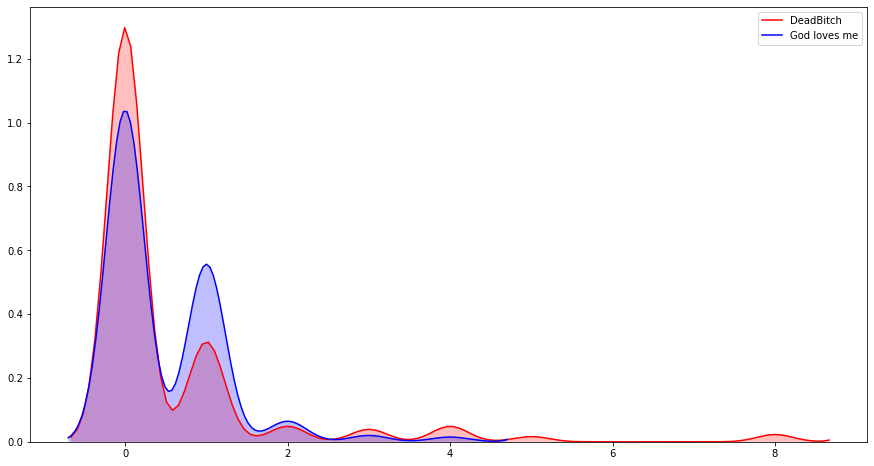

In [174]:
plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[(df.Survived==0),'SibSp'], shade = True, color ='r', label ='DeadBitch')
sns.kdeplot(df.loc[(df.Survived==1),'SibSp'], shade = True, color ='b', label = 'God loves me')

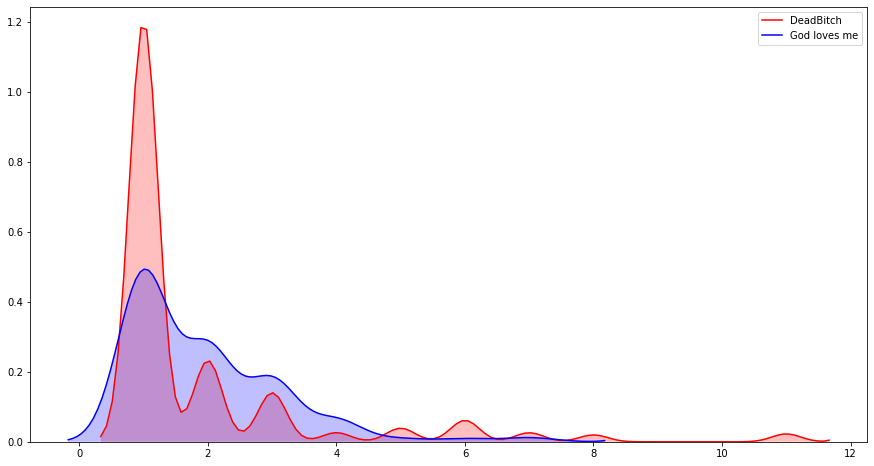

In [175]:
plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[(df.Survived==0),'family'], shade = True, color ='r', label ='DeadBitch')
sns.kdeplot(df.loc[(df.Survived==1),'family'], shade = True, color ='b', label = 'God loves me')

In [176]:
alone = []
for t in df['family']:
    if t ==1:
        alone.append(0)
    else:
        alone.append(1)


In [177]:
df['alone'] = alone
#df.drop('family', axis=1,inplace =True)

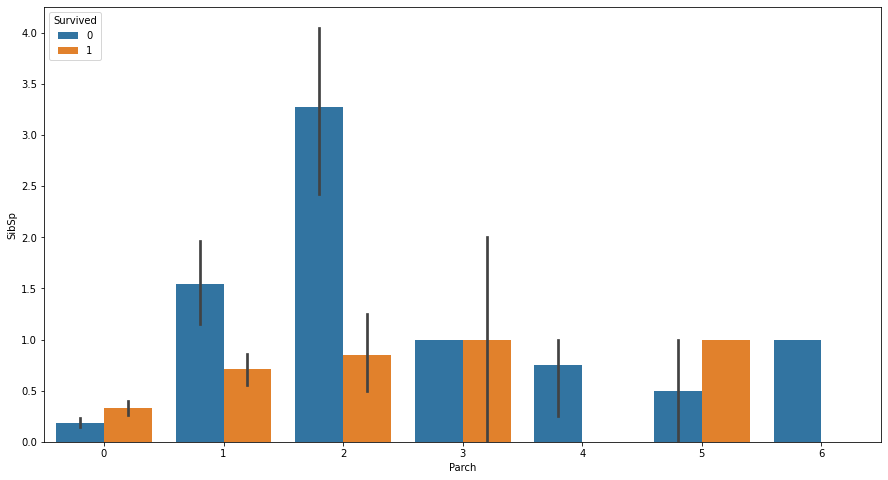

In [178]:
plt.subplots(figsize=(15,8))
sns.barplot(x='Parch', y='SibSp', hue = 'Survived',data = df)

In [179]:
df = pd.get_dummies(df,drop_first = True)

In [180]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,high_class,family,alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,fare_cat_low,fare_cat_mid
Survived,1.000000,-0.338481,-0.083892,-0.035322,0.081629,0.261742,-0.167675,0.322308,0.016639,0.203367,-0.543351,0.327106,-0.546521,0.344223,-0.003024,-0.283116,0.201847
Pclass,-0.338481,1.000000,-0.365698,0.083081,0.018443,-0.604960,0.162098,-0.916673,0.065997,-0.135207,0.131900,0.001487,0.139188,-0.159609,-0.185899,0.613305,-0.437600
Age,-0.083892,-0.365698,1.000000,-0.308237,-0.188286,0.101560,-0.033202,0.310276,-0.301454,-0.195773,0.090365,-0.274199,0.207712,0.180253,0.165081,-0.182920,0.184841
SibSp,-0.035322,0.083081,-0.308237,1.000000,0.414838,0.211816,0.068230,-0.092548,0.890712,0.584471,-0.114631,0.090948,-0.249598,0.059419,-0.041214,-0.182078,0.191937
Parch,0.081629,0.018443,-0.188286,0.414838,1.000000,0.263910,0.039798,-0.015790,0.783111,0.583398,-0.245489,0.108651,-0.335107,0.216862,-0.061598,-0.099801,0.003363
Fare,0.261742,-0.604960,0.101560,0.211816,0.263910,1.000000,-0.196229,0.456876,0.276580,0.334307,-0.222361,0.132714,-0.228053,0.141749,0.029700,-0.787727,0.348524
Embarked,-0.167675,0.162098,-0.033202,0.068230,0.039798,-0.196229,1.000000,-0.067291,0.066516,-0.063532,0.108262,-0.090339,0.095208,-0.037116,-0.025199,0.182055,-0.069290
high_class,0.322308,-0.916673,0.310276,-0.092548,-0.015790,0.456876,-0.067291,1.000000,-0.071142,0.129472,-0.137143,-0.015781,-0.153444,0.186527,0.184335,-0.438207,0.314681
family,0.016639,0.065997,-0.301454,0.890712,0.783111,0.276580,0.066516,-0.071142,1.000000,0.690922,-0.200988,0.116440,-0.338006,0.148952,-0.058942,-0.174303,0.132863
alone,0.203367,-0.135207,-0.195773,0.584471,0.583398,0.334307,-0.063532,0.129472,0.690922,1.000000,-0.303646,0.059894,-0.394266,0.356846,-0.064252,-0.298248,0.239571


In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [184]:
X_train.isnull().sum()

Pclass            0
Age             119
SibSp             0
Parch             0
Fare              3
Embarked          0
high_class        0
family            0
alone             0
Sex_male          0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rare        0
fare_cat_low      0
fare_cat_mid      0
dtype: int64

In [185]:
X_train['Age'].mode()


0    24.0
dtype: float64

In [186]:
X_train['Age'] =  X_train['Age'].fillna(29.42)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
X_train.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            3
Embarked        0
high_class      0
family          0
alone           0
Sex_male        0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
fare_cat_low    0
fare_cat_mid    0
dtype: int64

In [188]:
X_test['Age'].mean()

30.04978813559322

In [189]:
X_test['Age'] = X_test['Age'].fillna(30.0497)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
X_test['Fare'].mean()

32.79297898305083

In [191]:

X_test['Fare'] = X_test['Fare'].fillna(32.79)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,high_class,family,alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,fare_cat_low,fare_cat_mid
709,3,30.0497,1,1,15.2458,1,0,3,1,1,0,0,0,0,1,0
439,2,31.0000,0,0,10.5000,3,1,1,0,1,0,1,0,0,1,0
840,3,20.0000,0,0,7.9250,3,0,1,0,1,0,1,0,0,1,0
720,2,6.0000,0,1,33.0000,3,1,2,1,0,1,0,0,0,1,0
39,3,14.0000,1,0,11.2417,1,0,2,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,19.0000,0,0,7.6500,3,0,1,0,1,0,1,0,0,1,0
525,3,40.5000,0,0,7.7500,2,0,1,0,1,0,1,0,0,1,0
381,3,1.0000,0,2,15.7417,1,0,3,1,0,1,0,0,0,1,0
140,3,30.0497,0,2,15.2458,1,0,3,1,0,0,0,1,0,1,0


In [193]:
X_test.reset_index(drop =True)
#X_test.drop('index', axis=1,inplace =True)

,Pclass,Age,SibSp,Parch,Fare,Embarked,high_class,family,alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,fare_cat_low,fare_cat_mid
0,3,30.0497,1,1,15.2458,1,0,3,1,1,0,0,0,0,1,0
1,2,31.0000,0,0,10.5000,3,1,1,0,1,0,1,0,0,1,0
2,3,20.0000,0,0,7.9250,3,0,1,0,1,0,1,0,0,1,0
3,2,6.0000,0,1,33.0000,3,1,2,1,0,1,0,0,0,1,0
4,3,14.0000,1,0,11.2417,1,0,2,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,3,19.0000,0,0,7.6500,3,0,1,0,1,0,1,0,0,1,0
291,3,40.5000,0,0,7.7500,2,0,1,0,1,0,1,0,0,1,0
292,3,1.0000,0,2,15.7417,1,0,3,1,0,1,0,0,0,1,0
293,3,30.0497,0,2,15.2458,1,0,3,1,0,0,0,1,0,1,0


X_test['Age_catergory'] = X_test['Age']


In [194]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,high_class,family,alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,fare_cat_low,fare_cat_mid
709,3,30.0497,1,1,15.2458,1,0,3,1,1,0,0,0,0,1,0
439,2,31.0000,0,0,10.5000,3,1,1,0,1,0,1,0,0,1,0
840,3,20.0000,0,0,7.9250,3,0,1,0,1,0,1,0,0,1,0
720,2,6.0000,0,1,33.0000,3,1,2,1,0,1,0,0,0,1,0
39,3,14.0000,1,0,11.2417,1,0,2,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,19.0000,0,0,7.6500,3,0,1,0,1,0,1,0,0,1,0
525,3,40.5000,0,0,7.7500,2,0,1,0,1,0,1,0,0,1,0
381,3,1.0000,0,2,15.7417,1,0,3,1,0,1,0,0,0,1,0
140,3,30.0497,0,2,15.2458,1,0,3,1,0,0,0,1,0,1,0


Xt = []
for t in range(len(X_test)):
    if X_test.iloc[t,1] < 5:
        Xt.append('Infant') 
    else :
        Xt.append('Man')
        

X_test['Age_catergory'] = Xt

In [195]:
X_test = pd.get_dummies(X_test,drop_first = True)

In [196]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'high_class',
       'family', 'alone', 'Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'fare_cat_low', 'fare_cat_mid'],
      dtype='object')

X_train['Age_catergory'] = X_train['Age']

Xt = []
for t in range(len(X_train)):
    if X_train.iloc[t,1] < 5:
        Xt.append('Infant') 
    else :
        Xt.append('Man')

X_train['Age_catergory'] = Xt

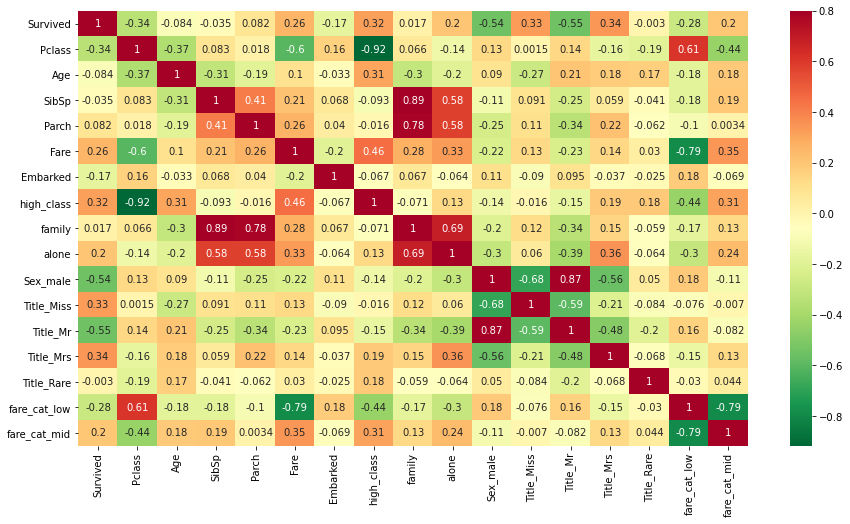

In [197]:
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot =True, cmap = 'RdYlGn_r', vmax=0.8)

In [198]:
k = X_train['Fare'].mode()

In [199]:

X_train['Fare'] = X_train['Fare'].fillna(8.05)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
X_train = pd.get_dummies(X_train,drop_first = True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler = MinMaxScaler()
trns = scaler1.fit_transform(X_train)
trns_test = scaler1.fit_transform(X_test)
X_train = pd.DataFrame(trns,columns = X_train.columns)

In [201]:
X_train.drop(['SibSp','Parch','fare_cat_mid'], axis=1,inplace =True)
X_test.drop(['SibSp','Parch','fare_cat_mid'], axis=1,inplace =True)


In [202]:
X_train

,Pclass,Age,Fare,Embarked,high_class,family,alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,fare_cat_low
6,1,54.00,51.8625,3,1,1,0,1,0,1,0,0,0
718,3,29.42,15.5000,2,0,1,0,1,0,1,0,0,1
685,2,25.00,41.5792,1,1,4,1,1,0,1,0,0,1
73,3,26.00,14.4542,1,0,2,1,1,0,1,0,0,1
882,3,22.00,10.5167,3,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.00,7.6500,3,0,1,0,0,1,0,0,0,1
270,1,29.42,31.0000,3,1,1,0,1,0,1,0,0,1
860,3,41.00,14.1083,3,0,3,1,1,0,1,0,0,1
435,1,14.00,120.0000,3,1,4,1,0,1,0,0,0,0


In [203]:
X_test

,Pclass,Age,Fare,Embarked,high_class,family,alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,fare_cat_low
709,3,30.0497,15.2458,1,0,3,1,1,0,0,0,0,1
439,2,31.0000,10.5000,3,1,1,0,1,0,1,0,0,1
840,3,20.0000,7.9250,3,0,1,0,1,0,1,0,0,1
720,2,6.0000,33.0000,3,1,2,1,0,1,0,0,0,1
39,3,14.0000,11.2417,1,0,2,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,19.0000,7.6500,3,0,1,0,1,0,1,0,0,1
525,3,40.5000,7.7500,2,0,1,0,1,0,1,0,0,1
381,3,1.0000,15.7417,1,0,3,1,0,1,0,0,0,1
140,3,30.0497,15.2458,1,0,3,1,0,0,0,1,0,1


In [204]:
X_test.corr()

,Pclass,Age,Fare,Embarked,high_class,family,alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,fare_cat_low
Pclass,1.000000,-0.346217,-0.619022,0.204550,-0.918155,0.006239,-0.198267,0.140085,-0.007897,0.177973,-0.160895,-0.189581,0.640694
Age,-0.346217,1.000000,0.099136,-0.114647,0.307329,-0.277754,-0.173565,0.063776,-0.255241,0.160545,0.180095,0.166195,-0.158080
Fare,-0.619022,0.099136,1.000000,-0.321360,0.479234,0.256525,0.350001,-0.219798,0.132335,-0.236210,0.144832,-0.006418,-0.803343
Embarked,0.204550,-0.114647,-0.321360,1.000000,-0.089213,0.001670,-0.117731,0.137554,-0.113293,0.103039,-0.062429,0.037759,0.279555
high_class,-0.918155,0.307329,0.479234,-0.089213,1.000000,-0.007458,0.207853,-0.165516,-0.016971,-0.202259,0.224753,0.186655,-0.474733
family,0.006239,-0.277754,0.256525,0.001670,-0.007458,1.000000,0.765716,-0.247082,0.132104,-0.366444,0.185061,-0.080486,-0.129881
alone,-0.198267,-0.173565,0.350001,-0.117731,0.207853,0.765716,1.000000,-0.356216,0.076114,-0.424052,0.389932,-0.104608,-0.338849
Sex_male,0.140085,0.063776,-0.219798,0.137554,-0.165516,-0.247082,-0.356216,1.000000,-0.657929,0.862085,-0.580071,0.093897,0.194227
Title_Miss,-0.007897,-0.255241,0.132335,-0.113293,-0.016971,0.132104,0.076114,-0.657929,1.000000,-0.567191,-0.220416,-0.088697,-0.075054
Title_Mr,0.177973,0.160545,-0.236210,0.103039,-0.202259,-0.366444,-0.424052,0.862085,-0.567191,1.000000,-0.500071,-0.201232,0.192666


X_train['Fare'] *=  X_train['high_class']

In [205]:
d = pd.concat([X_test.reset_index(drop=True),y_test.reset_index(drop=True)],axis=1)

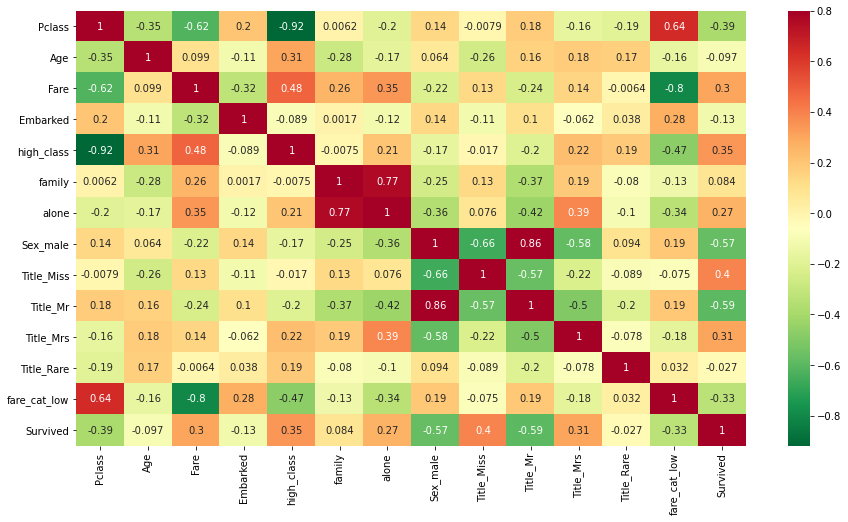

In [206]:
plt.subplots(figsize = (15,8))
sns.heatmap(d.corr(), annot =True, cmap = 'RdYlGn_r', vmax=0.8)

In [207]:
X_train.isnull().sum()

Pclass          0
Age             0
Fare            0
Embarked        0
high_class      0
family          0
alone           0
Sex_male        0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
fare_cat_low    0
dtype: int64

In [208]:
X_train = X_train.reset_index(drop =True)
X_test = X_test.reset_index(drop =True)

In [209]:
X_test.isnull().sum()

Pclass          0
Age             0
Fare            0
Embarked        0
high_class      0
family          0
alone           0
Sex_male        0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
fare_cat_low    0
dtype: int64

In [210]:
#Ml model
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [211]:
#define and fit model
logreg = LogisticRegression(max_iter = 500000)
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
gnb = GaussianNB()
dtree = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
logreg.fit(X_train,y_train)
lda.fit(X_train,y_train)
knn.fit(X_train,y_train)
gnb.fit(X_train,y_train)
dtree.fit(X_train,y_train)
svc.fit(X_train,y_train)
xgb.fit(X_train,y_train)
rf.fit(X_train,y_train)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [212]:
print("logreg : {}\nlda : {}\nknn : {}\ngnb : {}\ndtree : {}\nsvc : {}\nxgb : {}\nRf : {}\nada : {}".format(logreg.score(X_test,y_test),
lda.score(X_test,y_test),
knn.score(X_test,y_test),
gnb.score(X_test,y_test),
dtree.score(X_test,y_test),
svc.score(X_test,y_test),
xgb.score(X_test,y_test),
rf.score(X_test,y_test),
ada.score(X_test,y_test)            ))

logreg : 0.8305084745762712
lda : 0.847457627118644
knn : 0.7220338983050848
gnb : 0.7932203389830509
dtree : 0.7593220338983051
svc : 0.6644067796610169
xgb : 0.8135593220338984
Rf : 0.8101694915254237
ada : 0.823728813559322


In [214]:
#hyper parameter tuning logistic regression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
logic = RandomizedSearchCV(logistic, distributions, random_state=0, cv=5,verbose=2)
search = logic.fit(X_train,y_train)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.0s
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.0s
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.0s
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.0s
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.0s
[CV] C=3.3770629943240693, penalty=l1 ................................
[CV] ................. C=3.3770629943240693, penalty=l1, total=   0.0s
[CV] C=3.3770629943240693, penalty=l1 ................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=3.3770629943240693, penalty=l1, total=   0.0s
[CV] C=2.1795327319875875, penalty=l1 ................................
[CV] ................. C=2.1795327319875875, penalty=l1, total=   0.0s
[CV] C=2.1795327319875875, penalty=l1 ................................
[CV] ................. C=2.1795327319875875, penalty=l1, total=   0.0s
[CV] C=2.1795327319875875, penalty=l1 ................................
[CV] ................. C=2.1795327319875875, penalty=l1, total=   0.0s
[CV] C=2.1795327319875875, penalty=l1 ................................
[CV] ................. C=2.1795327319875875, penalty=l1, total=   0.0s
[CV] C=2.1795327319875875, penalty=l1 ................................
[CV] ................. C=2.1795327319875875, penalty=l1, total=   0.0s
[CV] C=2.4942547871438894, penalty=l2 ................................
[CV] ................. C=2.4942547871438894, penalty=l2, total=   0.0s
[CV] C=2.4942547871438894, penalty=l2 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


In [215]:
para_lda = {
    'solver' : ['svd','lsqr','eigen'],
    'shrinkage' : ['auto', 'float', 'None'],
    
    
}
lda2 =  LinearDiscriminantAnalysis(tol=1e-2)
ldacv = RandomizedSearchCV(lda2,para_lda,cv=5,verbose=2,random_state=42, n_jobs=-1,)
ldacv.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearDiscriminantAnalysis(n_components=None,
                                                        priors=None,
                                                        shrinkage=None,
                                                        solver='svd',
                                                        store_covariance=False,
                                                        tol=0.01),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'shrinkage': ['auto', 'float', 'None'],
                                        'solver': ['svd', 'lsqr', 'eigen']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [216]:
print(ldacv.score(X_test,y_test),ldacv.best_params_)

0.8305084745762712 {'solver': 'lsqr', 'shrinkage': 'auto'}


In [217]:
for t in para_lda['solver'] :
        lda2 =  LinearDiscriminantAnalysis(t,tol=1e-2)
        lda2.fit(X_train,y_train)
        print(t, lda2.score(X_test,y_test))
        
    

svd 0.847457627118644
lsqr 0.847457627118644
eigen 0.847457627118644


In [218]:
print(search.score(X_test,y_test),search.best_params_)

0.6949152542372882 {'C': 2.195254015709299, 'penalty': 'l1'}


In [219]:
para_ada = {
    'n_estimators'  : [50,100,200,500,1000,2000],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,1.0,2.0],
    'algorithm'     : ['SAMME','SAMME.R']
}
ada_cv=  RandomizedSearchCV(ada, para_ada,random_state=0, cv=5,verbose=2)
ada_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, learning_rate=1.0, algorithm=SAMME .............
[CV]  n_estimators=50, learning_rate=1.0, algorithm=SAMME, total=   0.1s
[CV] n_estimators=50, learning_rate=1.0, algorithm=SAMME .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=1.0, algorithm=SAMME, total=   0.1s
[CV] n_estimators=50, learning_rate=1.0, algorithm=SAMME .............
[CV]  n_estimators=50, learning_rate=1.0, algorithm=SAMME, total=   0.1s
[CV] n_estimators=50, learning_rate=1.0, algorithm=SAMME .............
[CV]  n_estimators=50, learning_rate=1.0, algorithm=SAMME, total=   0.1s
[CV] n_estimators=50, learning_rate=1.0, algorithm=SAMME .............
[CV]  n_estimators=50, learning_rate=1.0, algorithm=SAMME, total=   0.1s
[CV] n_estimators=1000, learning_rate=2.0, algorithm=SAMME ...........
[CV]  n_estimators=1000, learning_rate=2.0, algorithm=SAMME, total=   2.1s
[CV] n_estimators=1000, learning_rate=2.0, algorithm=SAMME ...........
[CV]  n_estimators=1000, learning_rate=2.0, algorithm=SAMME, total=   2.0s
[CV] n_estimators=1000, learning_rate=2.0, algorithm=SAMME ...........
[CV]  n_estimators=1000, learning_rate=2.0, algorithm=SAMME, total=   2.0s
[CV] n_estimators=1000, learning_rate=2.0, algorithm=SAMM

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 1.0, 2.0],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000, 2000]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [220]:
print(ada_cv.score(X_test,y_test),ada_cv.best_params_)

0.8271186440677966 {'n_estimators': 200, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


ada_score = []
for t in para_ada['n_estimators']:
    for k in para_ada['learning_rate']:
        for l in para_ada['algorithm' ]:
            ada2 = AdaBoostClassifier(n_estimators = t,learning_rate = k,algorithm = l, random_state=0)
            ada2.fit(X_train,y_train)
            print(t,k,l,ada2.score(X_test,y_test))
            ada_score.append(ada2.score(X_test,y_test))

In [ ]:
max(ada_score)

In [221]:

param =  {
    
    
        'n_neighbors' : [2,3,4,5,6,7,8,9],
    'weights'     : ['uniform', 'distance'],
    'algorithm'   :['auto ','brute']
    
}
params =  {
    
    
        'n_neighbors' : [2,3,4,5,6,7,8,9],
    'weights'     : ['uniform', 'distance'],
    'algorithm'   :['ball_tree', 'kd_tree'],
    'leaf_size'   : [10,20,30,50,80,100,200]
    
}
knn_cv = RandomizedSearchCV(knn, param, random_state=0,n_jobs=-1, cv=5,verbose=2)
knn_cv.fit(X_train,y_train)
print(knn_cv.score(X_test,y_test),knn_cv.best_params_, knn_cv.score(X_train,y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7220338983050848 {'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'brute'} 0.7953020134228188


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [222]:
xg_grid = { 
    "learning_rate"    : [0.04,0.03,0.02,0.05,0.06,0.07,0.08,0.085],
    "max_depth"        : [1,2,3,5,6,7,9,10,12,4,8],
    "min_child_weigth" : [1,3,5,7,2,4,6],
    "gamma"           : [0,0.1,0.2,0.3,0.4],
     "cosplay_bytree"  :  [0.2,0.3,0.5,0.6,0.7,0.8,0.9]
          }
xgb = RandomizedSearchCV(estimator =xgb, param_distributions = xg_grid, n_iter = 35, cv = 5, verbose=2, random_state=0, n_jobs = -1)
xgb.fit(X_train,y_train)
print(xgb.score(X_test,y_test),
xgb.best_params_, xgb.score(X_train,y_train))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 168 out of 175 | elapsed:    5.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.9s finished


0.8338983050847457 {'min_child_weigth': 4, 'max_depth': 3, 'learning_rate': 0.06, 'gamma': 0.2, 'cosplay_bytree': 0.6} 0.8708053691275168


xg_sc = []
for t in xg_grid['learning_rate']:
    for u in xg_grid['max_depth']:
        for v in xg_grid['min_child_weigth']:
            for w in xg_grid['gamma']:
                for x in xg_grid['cosplay_bytree']:
                    xgbb = XGBClassifier(learning_rate = t,max_depth = u, min_child_weigth =v, gamma = w, cosplay_bytree = x)
                    xgbb.fit(X_train,y_train)
                    print(t,u,v,w,x,xgbb.score(X_test,y_test))
                    xg_sc.append(xgbb.score(X_test,y_test))
                    

max(xg_sc)

In [223]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,7,8,9,10,11,15,20,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 35, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
print(rf_random.score(X_test,y_test),rf_random.best_params_,rf_random.score(X_train,y_train))

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  1.5min finished


0.8305084745762712 {'n_estimators': 1200, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True} 0.8691275167785235


len(rf_sc)

In [ ]:
scv_grid = {
    'C' :[0.1,0.2,0.3,0.35,0.4,0.45,0.46,0.47,0.48,0.49,0.5],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3,4,5,6,7,8,9,10]
}
svc_rcv = RandomizedSearchCV(estimator = svc, param_distributions = scv_grid, n_iter = 35, cv = 3, verbose=2, random_state=0, n_jobs = -1)
svc_rcv.fit(X_train,y_train)
print(svc_rcv.score(X_test,y_test),svc_rcv.best_params_,svc_rcv.score(X_train,y_train))

# test data

In [ ]:
dt.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace = True)

In [ ]:
dt.isnull().sum()

In [ ]:
dt

In [ ]:
dt['Embarked'].fillna('S', inplace =True)

In [ ]:
amb = []
for t in dt['Embarked']:
    if t=='C':
        amb.append(1)
    elif t=='Q':
        amb.append(2)
    else:
        amb.append(3)

dt['Embarked'] = amb

In [ ]:
dt

In [ ]:
dt['Fare'].mode()

In [ ]:
dt['Fare'] =  dt['Fare'].fillna(7.75)

In [ ]:
dt

In [ ]:
from sklearn.metrics import accuracy_score

acc=[]
for l in range(100):
    for k in range(100):
        val = (k * rf_random.predict(X_test) + (100-k-l) * xgb.predict(X_test) + l * logreg.predict((X_test)))/100
        for t in range(len(val)):
            if (val[t]>=0.4):
                val[t]=1;
            else:
                val[t]=0;
        acc.append(accuracy_score(y_test,val))
        print(l,k,accuracy_score(y_test,val))   

max(acc)

sns.lineplot(y = acc, x = range(len(acc)) )

for t in range(len(sumb)):
    if (sumb[t]>=1):
        sumb[t]=1;
    

In [ ]:
title =[]
for t in dt['Name']:
    if 'Mrs.' in t:
        title.append('Mrs')
    elif 'Master.' in t:
        title.append('Master')
    elif 'Misc.' in t:
        title.append('Misc')
    elif 'Miss.' in t:
        title.append('Miss')
    elif 'Mr.' in t:
        title.append('Mr')
    else:
        title.append('Rare')

dt.drop(['Name'],axis=1,inplace =True)
dt['Title'] = title

In [ ]:


fare = []
for t in dt['Fare']:
    if t<50 :
        fare.append('low')
    elif t<100:
        fare.append('mid')
    else :
        fare.append('high')
        
#high class people die more
hclass = []
for t in dt['Pclass']:
    if t==3:
        hclass.append(0)
    else:
        hclass.append(1)

dt['high_class'] = hclass
dt['family']  = dt['SibSp'] + dt['Parch'] +1 

alone = []
for t in dt['family']:
    if t ==1:
        alone.append(0)
    else:
        alone.append(1)

dt['alone'] = alone


In [ ]:
dt['Age'] =  dt['Age'].fillna(24)

In [ ]:
dt.isnull().sum()

In [ ]:
dt['Age_catergory'] = dt['Age']

In [ ]:
dt

In [ ]:
fare = []
for t in dt['Fare']:
    if t<50 :
        fare.append('low')
    elif t<100:
        fare.append('mid')
    else :
        fare.append('high')
        
dt['fare_cat'] = fare        

In [ ]:

Xt = []
for t in range(len(dt)):
    if dt.iloc[t,2] < 5:
        Xt.append('Infant') 
    else :
        Xt.append('Man')
dt['Age_catergory'] = Xt
dt = pd.get_dummies(dt,drop_first = True)


In [ ]:
dt

In [ ]:
dt.drop(['Age_catergory_Man'],axis=1,inplace=True)

In [ ]:
dt.drop(['SibSp','Parch','fare_cat_mid'], axis=1,inplace =True)


In [ ]:
sumb = svc_rcv.predict(dt)

In [ ]:
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sub['Survived'] = sumb
sub.to_csv("titanic_result.csv", index =False)